In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import time

In [2]:
def minimum4(x,y,z,q):
    min = np.argmin(q)

    return x[min], y[min], z[min]

# Transfusion Data

In [3]:

data = pd.read_csv('transfusion.csv')

In [4]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:


train = data.iloc[:,0:4]
labels = data.iloc[:,4:5].values.ravel()

#print(x)
#print(y)
hidden = [1,2,5]
nodes = [2,5,10]
x = []
y = []
z = []
p =[]
q =[]
r =[]

for i in hidden:
    for j in nodes:
        hid = [j for k in range(i)]
        classifier  = MLPClassifier(hidden_layer_sizes= hid, activation = "relu", epsilon=0.001, max_iter=10000,alpha=0, solver = "adam")
        cvs = cross_val_score(classifier, train, labels, cv = 10, scoring='accuracy')
        err = 1-cvs
        evsm = err.mean()
        evsd = err.std()
        p.append(err)
        x.append(len(hid))
        y.append(j)
        z.append(evsm)
        q.append(evsm + 2*evsd)
        r.append([len(hid), j, evsm])
        

        

In [6]:
r

[[1, 2, 0.2886126126126126],
 [1, 5, 0.29524324324324325],
 [1, 10, 0.22850450450450452],
 [2, 2, 0.24057657657657655],
 [2, 5, 0.2846126126126126],
 [2, 10, 0.2925405405405405],
 [5, 2, 0.28994594594594597],
 [5, 5, 0.22996396396396399],
 [5, 10, 0.25398198198198196]]

In [7]:
table = pd.DataFrame(data = r, columns = ["No of Hidden Layers", 'No of Nodes per hidden layer', 'Cross Validation Error'])
table

,No of Hidden Layers,No of Nodes per hidden layer,Cross Validation Error
0,1,2,0.288613
1,1,5,0.295243
2,1,10,0.228505
3,2,2,0.240577
4,2,5,0.284613
5,2,10,0.292541
6,5,2,0.289946
7,5,5,0.229964
8,5,10,0.253982


In [8]:
l,n,e = minimum4(x,y,z,q)
print("The optimal number of hidden layers is " + str(l))
print("The optimal number of nodes per hidden layer is " + str(n))
print("The minimum cross validation error is " + str(e))

The optimal number of hidden layers is 5
The optimal number of nodes per hidden layer is 5
The minimum cross validation error is 0.22996396396396399


In [9]:
hid_b = [n for i in range(l)]
classifier_b  = MLPClassifier(hidden_layer_sizes= hid_b, activation = "relu", epsilon=0.001, max_iter=10000,alpha=0, solver = "adam")
cvs = cross_val_score(classifier_b, train, labels, cv = 10, scoring='accuracy')
print("The best accuracy is " + str(cvs.mean()))

The best accuracy is 0.722054054054054


In [10]:
print("The weights are " + str(classifier_b.fit(train, labels).coefs_))

The weights are [array([[ 0.55394737,  0.68668164, -0.36705458,  0.2603736 ,  0.80120886],
       [ 0.66115281, -0.80420095, -0.36234445,  0.2444522 , -0.64978515],
       [ 0.51841656, -0.05912186,  0.53240651, -0.69836782, -0.40093678],
       [ 0.42383207,  0.6181752 , -0.65056749, -0.36353269, -0.50084123]]), array([[-0.05312566, -0.01608675, -0.3337429 ,  0.00970157, -0.32379265],
       [-0.65212197, -0.75662448, -0.07745145,  0.38916342, -0.22969014],
       [ 0.29603045,  0.0829719 , -0.19948284, -0.61995677,  0.18250904],
       [-0.63210628,  0.45144696,  0.2559276 ,  0.32110969,  0.65520317],
       [-0.21576962, -0.27515927, -0.6135413 ,  0.36798311,  0.6091102 ]]), array([[-0.50946818, -0.47318607,  0.24403787, -0.55618762,  0.3570078 ],
       [ 0.09407084, -0.13151903, -0.40785498,  0.25516319,  0.04651847],
       [-0.61786986, -0.48677652, -0.72184987, -0.0172925 , -0.03669558],
       [-0.22214698,  0.68518596,  0.26947532, -0.31051062, -0.65706886],
       [ 0.680062

# Digits Data

In [11]:


data1 = np.loadtxt('data.csv')

In [12]:
#shuffle the data and select training and test data
# np.random.seed(100)
np.random.shuffle(data1)


features = []
digits = []


for row in data1:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

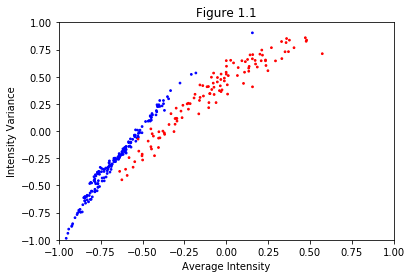

In [13]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
mp.title("Figure 1.1")
#display the current graph
mp.show()

In [14]:
# converting into a dataframe

data1_2 = pd.read_csv('data.csv', header = None, sep = ' ')
data1_2.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [15]:

hidden = [1,2,5,10]
nodes = [2,5,10,50,100]
x = []
y = []
z =[]
p = []
q =[]
r =[]
s =[]
n =[]
for i in hidden:
    print(i)
    for j in nodes:
        start_time = time.time()
        hid = [j for k in range(i)]
        classifier  = MLPClassifier(hidden_layer_sizes= hid, activation = "relu", epsilon=0.001, max_iter=10000,alpha=0, solver = "adam")
        cvs = cross_val_score(classifier, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
        end_time = time.time()
        t = (end_time - start_time)*1000
        h =len(hid)
        err = 1-cvs
        evsm = err.mean()
        evsd = err.std()
        x.append(evsm)
        y.append(h)
        z.append(j)
        s.append(h*j)
        p.append(t)
        q.append(evsm + 2*evsd)
        r.append([h,j, evsm, h*j, t])
        n.append([h,j, h*j])
        


        

1
2
5
10


# Q) a)

In [16]:
r

[[1, 2, 0.19315738025415446, 2, 13663.078546524048],
 [1, 5, 0.12482893450635388, 5, 15491.780042648315],
 [1, 10, 0.10928641251221896, 10, 17628.127336502075],
 [1, 50, 0.01593352883675463, 50, 26442.487955093384],
 [1, 100, 0.01593352883675463, 100, 26379.1823387146],
 [2, 2, 0.12326490713587487, 4, 21858.598232269287],
 [2, 5, 0.09012707722385141, 10, 28642.22502708435],
 [2, 10, 0.01593352883675463, 20, 32004.537105560303],
 [2, 50, 0.012707722385141729, 100, 32936.45739555359],
 [2, 100, 0.0064516129032258, 200, 43645.47610282898],
 [5, 2, 0.2354838709677419, 10, 23302.407264709473],
 [5, 5, 0.08064516129032258, 25, 39336.228132247925],
 [5, 10, 0.0064516129032258, 50, 22902.238607406616],
 [5, 50, 0.0064516129032258, 250, 17319.966793060303],
 [5, 100, 0.0064516129032258, 500, 22461.87400817871],
 [10, 2, 0.387781036168133, 20, 7141.540765762329],
 [10, 5, 0.27096774193548384, 50, 15355.326890945435],
 [10, 10, 0.2, 100, 14329.275369644165],
 [10, 50, 0.009677419354838701, 500, 1

In [17]:
table2 = pd.DataFrame(data = r, columns = ["No of Hidden Layers", 'No of Nodes per hidden layer', 
                                           'Cross Validation Error', 'Total No of Hidden Nodes', 'Runtime'])
table2

,No of Hidden Layers,No of Nodes per hidden layer,Cross Validation Error,Total No of Hidden Nodes,Runtime
0,1,2,0.193157,2,13663.078547
1,1,5,0.124829,5,15491.780043
2,1,10,0.109286,10,17628.127337
3,1,50,0.015934,50,26442.487955
4,1,100,0.015934,100,26379.182339
5,2,2,0.123265,4,21858.598232
6,2,5,0.090127,10,28642.225027
7,2,10,0.015934,20,32004.537106
8,2,50,0.012708,100,32936.457396
9,2,100,0.006452,200,43645.476103


Text(0, 0.5, 'RunTime')

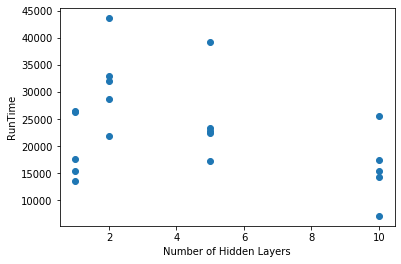

In [18]:
plt.scatter(y,p)
plt.xlabel("Number of Hidden Layers")
plt.ylabel("RunTime")

Text(0, 0.5, 'RunTime')

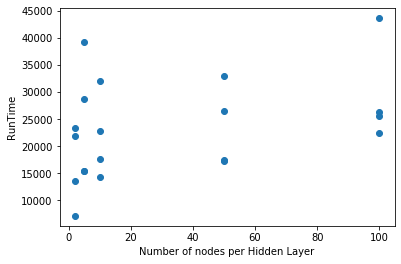

In [19]:
plt.scatter(z,p)
plt.xlabel("Number of nodes per Hidden Layer")
plt.ylabel("RunTime")

Text(0, 0.5, 'RunTime')

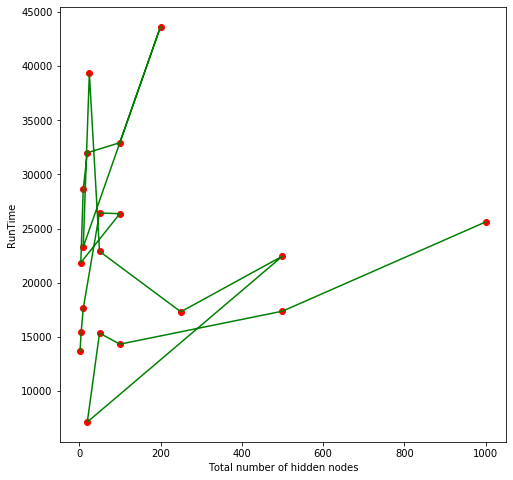

In [20]:
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(s,p, c ='r')
plt.plot(s,p, c='g')
plt.xlabel("Total number of hidden nodes")
plt.ylabel("RunTime")

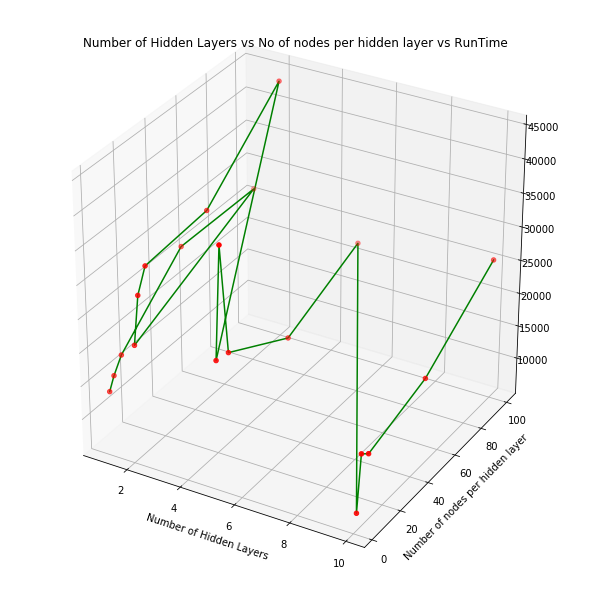

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize = (8,8))
ax = Axes3D(fig)
ax.scatter(y, z, p, c ='r')
ax.plot(y, z, p, c ='g')

plt.xlabel("Number of Hidden Layers")
plt.ylabel("Number of nodes per hidden layer")
#plt.zlabel("RunTime")
plt.title("Number of Hidden Layers vs No of nodes per hidden layer vs RunTime")
plt.show()


# Based on my observations, I didn't find any correlation between the Runtime and number of hidden layers; Runtime and Number of nodes per hidden layers. 

# Q) b)

In [22]:
l,n,e = minimum4(y,z,x,q)
print("The optimal number of hidden layers is " + str(l))
print("The optimal number of nodes per hidden layer is " + str(n))
print("The minimum cross validation error is " + str(e))

The optimal number of hidden layers is 2
The optimal number of nodes per hidden layer is 100
The minimum cross validation error is 0.0064516129032258


In [23]:
hid_b = [n for i in range(l)]
classifier_b_d  = MLPClassifier(hidden_layer_sizes= hid_b, activation = "relu", epsilon=0.001, max_iter=10000,alpha=0, solver = "adam")
cvs = cross_val_score(classifier_b_d, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
print("The best accuracy is " + str(cvs.mean()))

The best accuracy is 0.9935483870967742


# Q) c)

In [24]:

lr = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1]
x2 =[]
y2 =[]
z2 = []
p2 =[]
q2 =[]
r2 =[]
for i in lr:
    print(i)
    start_time = time.time()
    classifier  = MLPClassifier(hidden_layer_sizes= hid_b, activation = "relu", 
                                  learning_rate_init = i,epsilon=0.001, max_iter=10000,alpha=0, solver = "adam")
    cvs = cross_val_score(classifier, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
    end_time = time.time()
    t2 = (end_time - start_time) * 1000
    err = 1- cvs
    evsm = err.mean()
    evsd = err.std()
    x2.append(i)
    y2.append(evsm)
    z2.append(evsm + 2*evsd)
    p2.append(t2)
    q2.append(cvs.mean())
    r2.append([i,t2,cvs.mean()])

0.0001
0.0005
0.001
0.01
0.1
1


In [25]:
r2

[[0.0001, 89387.71772384644, 0.9681329423264906],
 [0.0005, 39378.113985061646, 0.9840664711632453],
 [0.001, 28146.377325057983, 0.9872922776148583],
 [0.01, 7759.200096130371, 0.9935483870967742],
 [0.1, 1423.4035015106201, 0.9806451612903226],
 [1, 1638.3097171783447, 0.9193548387096774]]

In [26]:
table3 = pd.DataFrame(data = r2, columns = ["Learning Rate", 'Runtime', 
                                           'Cross Validation Accuracy mean'])
table3

,Learning Rate,Runtime,Cross Validation Accuracy mean
0,0.0001,89387.717724,0.968133
1,0.0005,39378.113985,0.984066
2,0.0010,28146.377325,0.987292
3,0.0100,7759.200096,0.993548
4,0.1000,1423.403502,0.980645
5,1.0000,1638.309717,0.919355


Text(0.5, 1.0, 'Learning Rate vs RunTime')

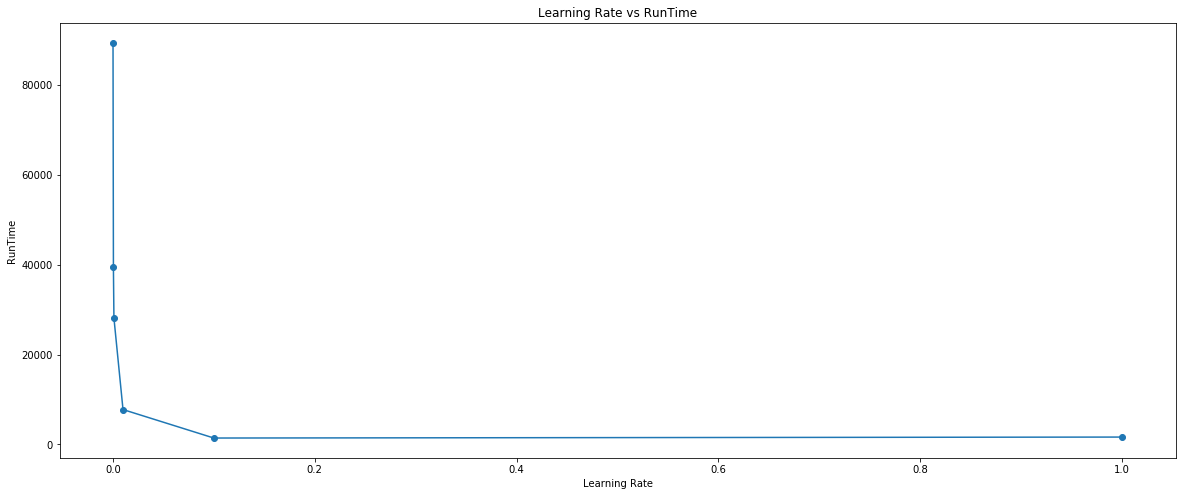

In [27]:
fig, ax = plt.subplots(figsize = (20,8))
plt.scatter(x2,p2)
plt.plot(x2,p2)
plt.xlabel("Learning Rate")
plt.ylabel("RunTime")
plt.title("Learning Rate vs RunTime")

In [28]:
def minimum3(x,y,z):
    min = np.argmax(z)

    return x[min], y[min], z[min]

In [29]:
l2,n2,e2 = minimum3(x2,p2,q2)
print("The optimal Learning rate is " + str(l2))
print("The optimal RunTime is " + str(n2))
print("The maximum cross validation accuracy is " + str(e2))

The optimal Learning rate is 0.01
The optimal RunTime is 7759.200096130371
The maximum cross validation accuracy is 0.9935483870967742


# Runtime decreased with learning rate

Text(0.5, 1.0, 'RunTime vs Accuracy')

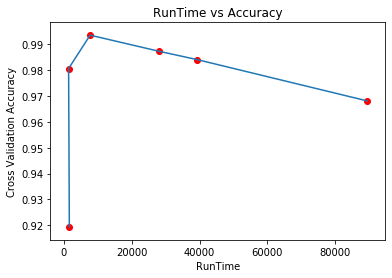

In [30]:
plt.plot(p2,q2)
plt.scatter(p2, q2, c='r')
plt.xlabel("RunTime")
plt.ylabel("Cross Validation Accuracy")
plt.title("RunTime vs Accuracy")

# Accuracy started increasing with Runtime until some point and started decreasing

Text(0.5, 1.0, 'Learning Rate vs Accuracy')

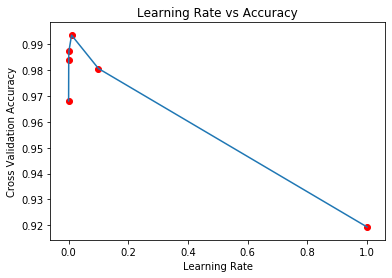

In [31]:
plt.plot(x2,q2)
plt.scatter(x2, q2, c='r')
plt.xlabel("Learning Rate")
plt.ylabel("Cross Validation Accuracy")
plt.title("Learning Rate vs Accuracy")

# Accuracy started increasing with learning Rate until some point and started decreasing
# It makes sense as with low learning rate, more iterations are needed to reach global minima.
# ANd with high learning rate, we bounce around minima due to high variance

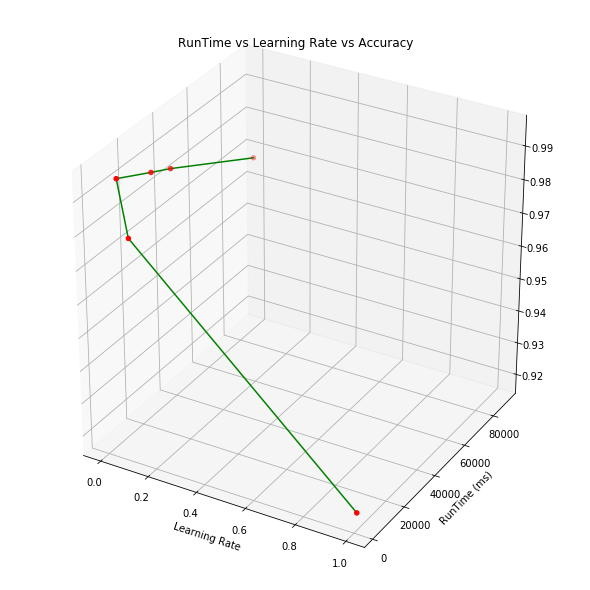

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize = (8,8))
ax = Axes3D(fig)
ax.scatter(x2, p2, q2, c ='r')
ax.plot(x2, p2, q2, c ='g')

plt.xlabel("Learning Rate")
plt.ylabel("RunTime (ms)")
#plt.zlabel("Cross Validation Accuracy")
plt.title("RunTime vs Learning Rate vs Accuracy")

plt.show()

# With high learning rate, the runtime is low but the accuracy is also low 
# as with high learning rate there would be high variance and we bounce around minima.

# And with low learning rate, the runtime is high and accuracy is also low but not that low like in case of high learning rate.
# The low accuracy is due to the fact that it takes more iterations to reach global minima with low learning rate

# Q) d)

# The Neural network doesn't provide same solution in terms of weights or number of hidden layers and number of nodes per hidden layer because the network starts training from random initial weights.
# This behavior might have an impact of expected fit because we are stopping the training after 10000 iterations. Some times with some weights, it might need more iterations for finding minima

# Q) e) Graduate Student Question

In [33]:
def decisionRegion(clf, X, Y):
    

# Lists to hold inpoints, predictions and assigned colors
    xPred = []
    yPred = []
    cPred = []
# Use input points to get predictions here
    for xP in range(-100,100):
        xP = xP/100.0
        for yP in range(-100,100):
            yP = yP/100.0
            xPred.append(xP)
            yPred.append(yP)
            if(clf.predict([[xP,yP]])=="1.0"):
                cPred.append("b")
            else:
                cPred.append("r")

## Visualize Results
#plot the points
    mp.scatter(X,Y,s=3,c=colors)

#plot the regions
    mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
    mp.xlim(-1,1)
    mp.xlabel("Average Intensity")
    mp.ylim(-1,1)
    mp.ylabel("Intensity Variance")


1


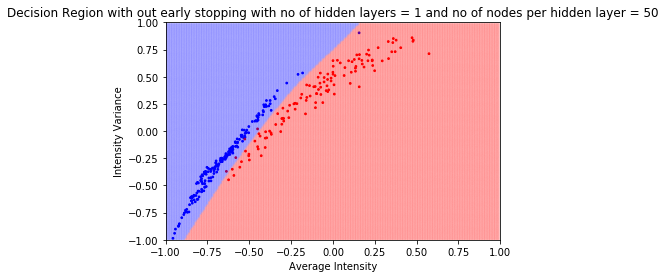

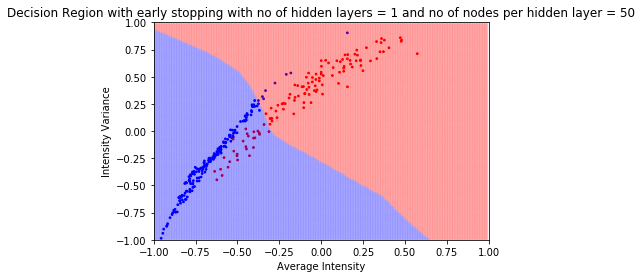

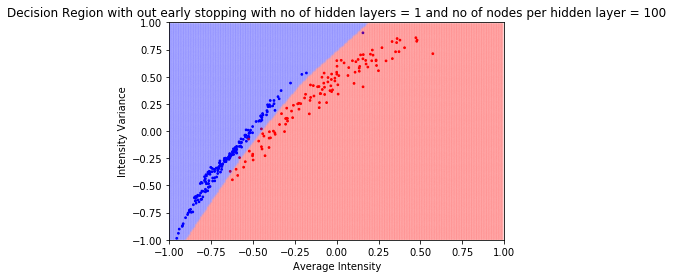

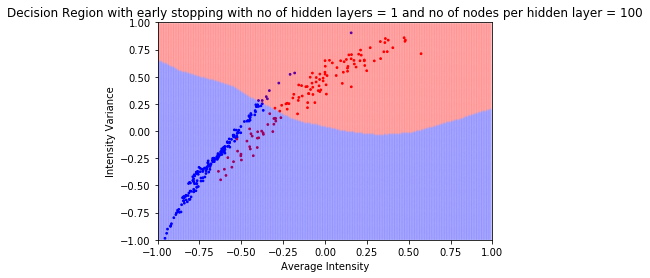

2


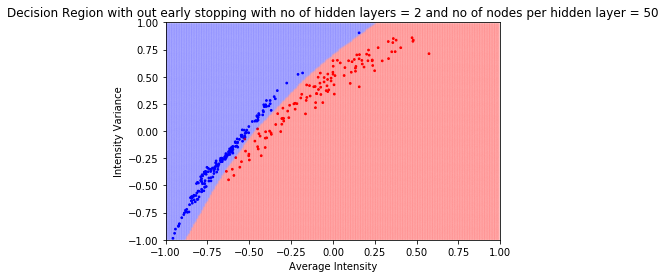

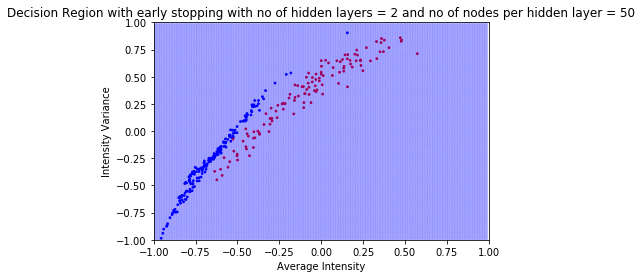

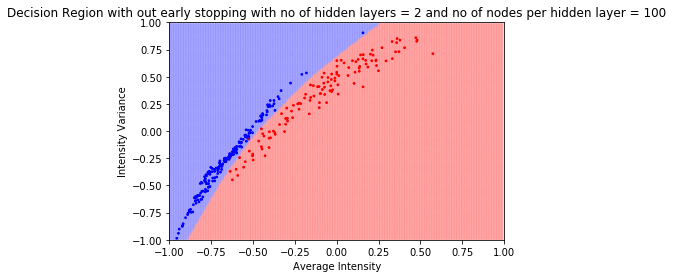

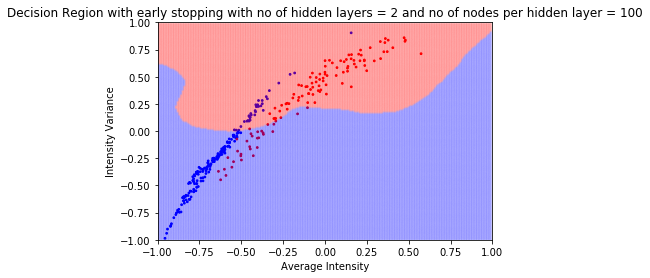

5


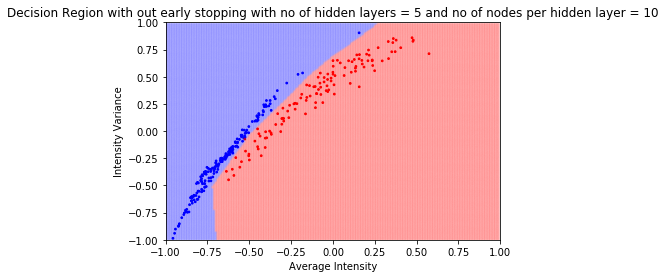

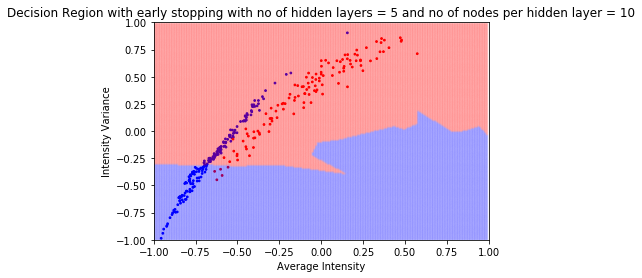

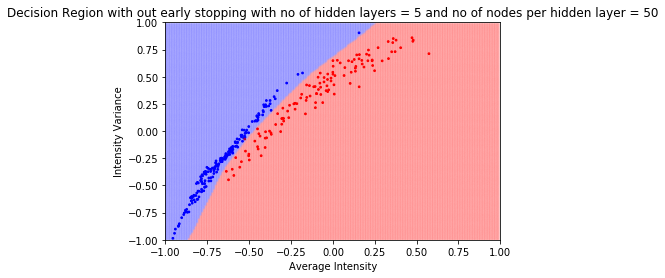

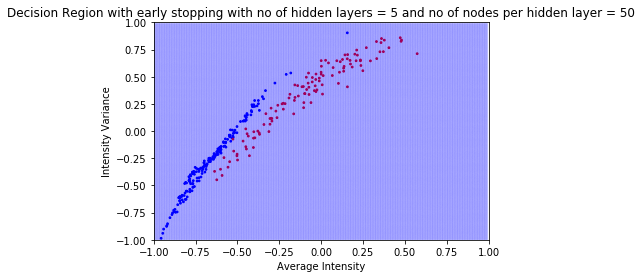

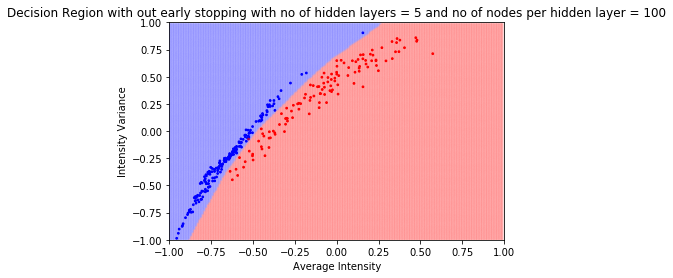

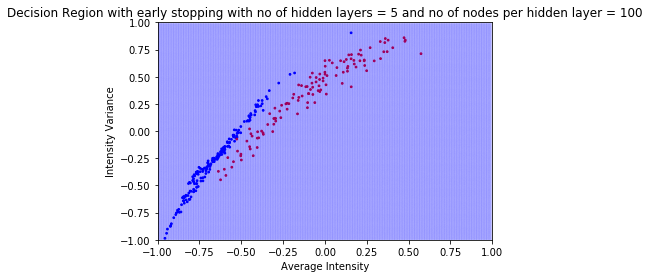

10


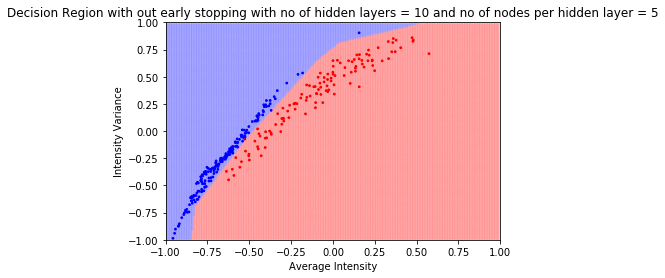

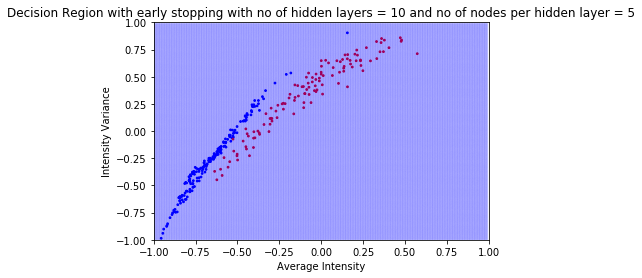

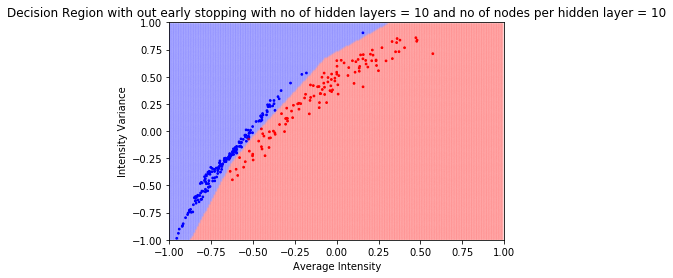

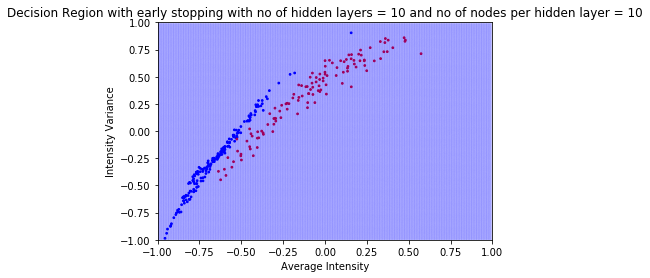

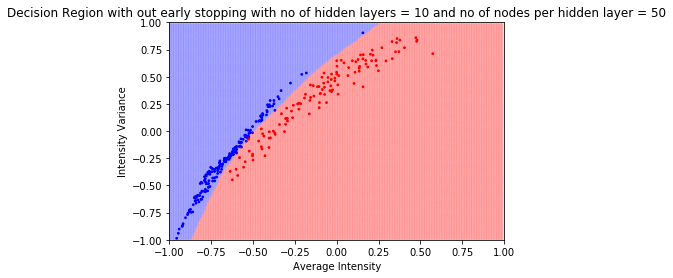

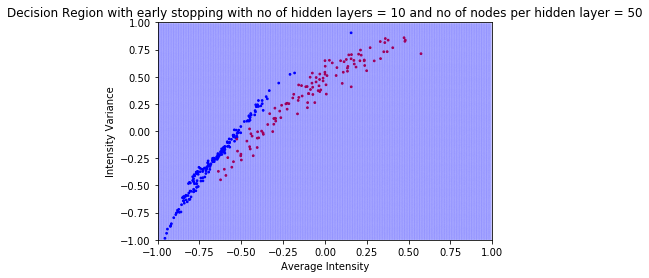

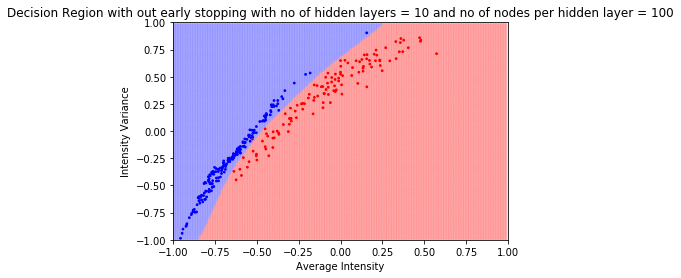

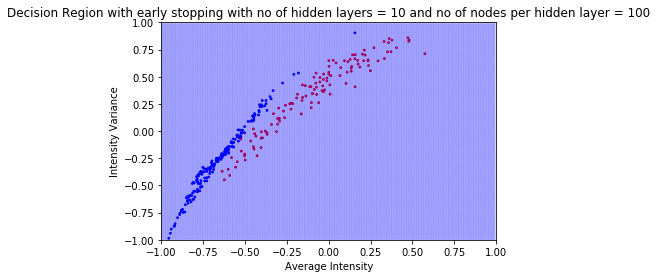

In [34]:
for i in hidden:
    print(i)
    for j in nodes:
        if i * j >=50:
            hid = [j for k in range(i)]
            classifier  = MLPClassifier(hidden_layer_sizes= hid, activation = "relu", epsilon=0.001, 
                                        max_iter=10000,alpha=0, solver = "adam")
            classifier.fit(simpleTrain, trainDigits)
            decisionRegion(classifier, X, Y )
            plt.title("Decision Region with out early stopping with no of hidden layers = " + str(i) + " and no of nodes per hidden layer = " + str(j))
            plt.show()
            classifier2  = MLPClassifier(hidden_layer_sizes= hid,  activation = "relu", epsilon=0.001, 
                                     max_iter=10000,alpha=0, solver = "adam", early_stopping = True)
            classifier2.fit(simpleTrain, trainDigits)
            decisionRegion(classifier2, X, Y )
            plt.title("Decision Region with early stopping with no of hidden layers = " + str(i) + " and no of nodes per hidden layer = " + str(j))
            plt.show()

# With early stopping, the models underfit the data because we don't get global minima or we could get only local minima as we are stopping the training early. 

Text(0.5, 1.0, 'Figure 3.1')

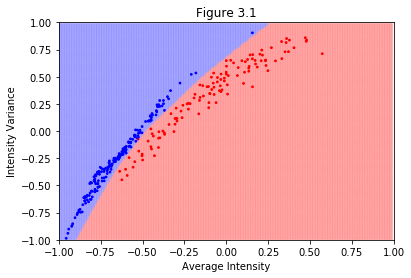

In [37]:
# Decision Region for optimal neural network
hid_b = [n for i in range(l)]
classifier_b_d  = MLPClassifier(hidden_layer_sizes= hid_b, activation = "relu", epsilon=0.001, 
                                learning_rate_init = l2, max_iter=10000,alpha=0, solver = "adam")
classifier_b_d.fit(simpleTrain, trainDigits)
# cvs = cross_val_score(classifier_b, simpleTrain, trainDigits, cv = 10, scoring='accuracy')
decisionRegion(classifier_b_d, X, Y )
plt.title("Figure 3.1")